In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import sys
import glob
import json
import os

# Creating extracted data folder

In [2]:
coswara_path = '../input/coswara'
extracted_data = os.path.join('.', 'Extracted_data')

if not os.path.exists(coswara_path):
    raise("Check path")
if not os.path.exists(extracted_data):
    os.mkdir(extracted_data)

In [13]:
os.path.exists(extracted_data)

True

## Extracting files

In [3]:
dirs_extracted = set(map(os.path.basename,glob.glob('{}/202*'.format(extracted_data))))
dirs_all = set(map(os.path.basename,glob.glob('{}/202*'.format(coswara_path))))

dirs_to_extract = list(set(dirs_all) - dirs_extracted)

for d in dirs_to_extract:
    p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_path, d, extracted_data), shell=True)
    p.wait()


print("Extraction process complete!")

Extraction process complete!


In [4]:
paths = glob.glob('./Extracted_data/202*/*')

In [5]:
for path in paths:
    if ('.csv' not in path) and ('.wav' not in path):
        try:
            p = subprocess.Popen(f'mv {path}/cough-heavy.wav {path}.wav',shell=True)
            p.wait()
            p = subprocess.Popen(f'rm -rf {path}',shell=True)
            p.wait()
        except Exception as e:
            print(e)

In [6]:
df = pd.read_csv('../input/coswara/combined_data.csv')

In [18]:
df.head()

,id,l_c,a,covid_status,ep,g,l_s,l_l,diabetes,asthma,...,cough,mp,ftg,st,loss_of_smell,cld,ihd,pneumonia,test,bd
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,healthy,y,male,Karnataka,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,healthy,y,male,Maharashtra,Thane,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,healthy,y,male,Maharashtra,Thane West,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,healthy,y,male,Karnataka,Bangalore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,healthy,y,male,Haryana,gurgaon,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.to_csv('./Extracted_data/combined_data.csv')

In [20]:
paths = glob.glob('./Extracted_data/202*')
paths[:3]

['./Extracted_data/20200814',
 './Extracted_data/20200417',
 './Extracted_data/20200424']

In [19]:
path_intern = glob.glob('./Extracted_data/202*/*')
path_intern[0]

'./Extracted_data/20200418/s9pMRe4F46aJf8Jg9SvLfJoxgg93.wav'

In [8]:
df[df['id']=='H0tBSJN5l8db5f6xB2yMm6QxjFO2']

,id,l_c,a,covid_status,ep,g,l_s,l_l,diabetes,asthma,...,cough,mp,ftg,st,loss_of_smell,cld,ihd,pneumonia,test,bd
258,H0tBSJN5l8db5f6xB2yMm6QxjFO2,United States,25,healthy,y,male,Delaware,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Visualizing audio files
import IPython.display as ipd 
import librosa
import librosa.display

## Visualizing the audio

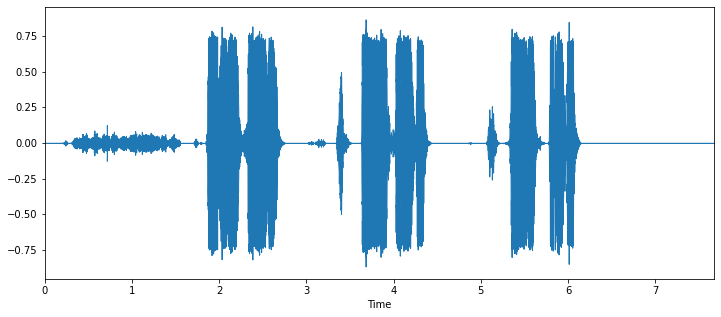

In [24]:
plt.figure(figsize=(12,5))
data, sample_rate = librosa.load(path_intern[0])
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(path_intern[0])

## Lets visualize audio of an infected person

In [25]:
df[df['covid_status']!='healthy']

,id,l_c,a,covid_status,ep,g,l_s,l_l,diabetes,asthma,...,cough,mp,ftg,st,loss_of_smell,cld,ihd,pneumonia,test,bd
8,L7S8iIPKgiO6QWLC3mGkROCMa0s1,India,40,resp_illness_not_identified,y,male,Gujarat,Ahmedabad,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,5ZDF98UQUxcVuS9VhaWxKlVnXvs1,India,23,no_resp_illness_exposed,y,female,Andhra Pradesh,Kurnool,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,eZ9KEu3fmEgvxINqgcbkBXoEsv53,India,25,no_resp_illness_exposed,y,male,Andhra Pradesh,Kadapa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,9XKj7fAmvwPUas9GFPZuTpev7T03,India,26,resp_illness_not_identified,y,male,Karnataka,Bangalore Urban,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,0Rlzhiz6bybk77wdLjxwy7yLDhg1,India,37,no_resp_illness_exposed,y,male,Maharashtra,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,m1s2RQ1f2LaqD6o9RArZkiDGoFr1,India,22,resp_illness_not_identified,y,female,Karnataka,Dakshin Kannada,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1265,FNYflY4qOecrSQOzynZ1WDQZfCJ3,United States,26,resp_illness_not_identified,y,male,California,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1271,N49IPlluNddotKfNlRNVJJ2Ad6E3,India,49,recovered_full,y,female,Karnataka,Bangalore,NaN,True,...,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,True
1273,wfC9G2gEocPkwkqAtaGxZDbK4oF2,India,26,no_resp_illness_exposed,y,male,Karnataka,Bangalore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
file_name = [file for file in path_intern if 'L7S8iIPKgiO6QWLC3mGkROCMa0s1' in file]

In [27]:
file_name[0]

'./Extracted_data/20200413/L7S8iIPKgiO6QWLC3mGkROCMa0s1.wav'

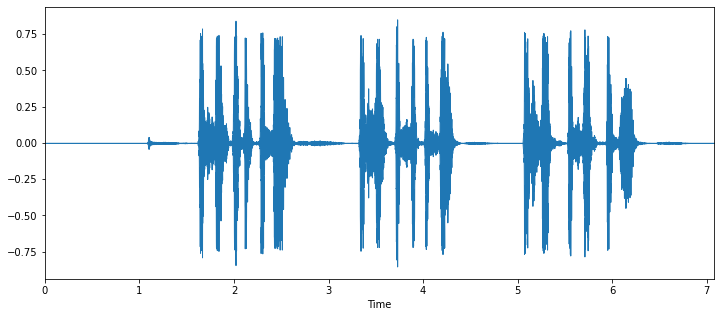

In [28]:
plt.figure(figsize=(12,5))
data,sample_rate = librosa.load(file_name[0])
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file_name[0])

### We can observe the difference between both waveplots

# EDA

In [7]:
df.head()

,id,l_c,a,covid_status,ep,g,l_s,l_l,diabetes,asthma,...,cough,mp,ftg,st,loss_of_smell,cld,ihd,pneumonia,test,bd
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,healthy,y,male,Karnataka,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,healthy,y,male,Maharashtra,Thane,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,healthy,y,male,Maharashtra,Thane West,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,healthy,y,male,Karnataka,Bangalore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,healthy,y,male,Haryana,gurgaon,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['covid_status'].value_counts()

healthy                        1102
no_resp_illness_exposed          79
resp_illness_not_identified      75
positive_mild                    21
positive_asymp                    7
recovered_full                    5
positive_moderate                 2
Name: covid_status, dtype: int64

### We will make it into a binary classification by dividing into two broad categories covid-infected and not infected

In [10]:
def binary(cols):
    if cols!='healthy':
        return 'infected'
    return cols

In [11]:
df['covid_status'].apply(binary).value_counts()

healthy     1102
infected     189
Name: covid_status, dtype: int64

### We observe that the dataset has a greater ratio of healthy patients

In [12]:
df['covid_status']=df['covid_status'].apply(binary)

In [14]:
df['covid_status'].unique()

array(['healthy', 'infected'], dtype=object)

## Analyzing audio 

In [29]:
from scipy.io import wavfile as wav

In [30]:
sample_rate,data = wav.read(file_name[0])

In [31]:
data

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [32]:
audio,sample_rate = librosa.load(file_name[0])
mfccs = librosa.feature.mfcc(y=audio)
mfccs.shape

(20, 306)

## We will now repeat this for all audio files

In [15]:
data_df=df.set_index('id')

In [226]:
def extract_features(file):
    try:
        audio,sample_rate = librosa.load(file)
        mfccs = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
        mfcc_scaled = np.mean(mfccs.T,axis=0)
        return mfcc_scaled
    except:
        return 'failed'

In [227]:
def str_split(string):
    if '.wav' in string:
        s = string.split('/')[3].split('.')[0]
        return s
    else:
        return 'failed'

In [228]:
extracted_features=[]
for file in path_intern:
    data = extract_features(file)
    ID = str_split(file)
    if data!='failed' or ID!='failed':
        label = data_df.loc[ID]['covid_status']
        extracted_features.append([data,label])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [229]:
features = pd.DataFrame(extracted_features,columns=['data','label'])

In [230]:
features.to_csv('extracted_features.csv')

In [231]:
def change_type(cols):
    if type(cols)!=str:
        return 'healthy'
    else:
        return cols

In [232]:
features['label'] = features['label'].apply(change_type)

In [233]:
features['label'].unique()

array(['healthy', 'infected'], dtype=object)

# EDA
## csv data

In [48]:
df.isnull().sum()

id                  0
l_c                 0
a                   0
covid_status        0
ep                  0
g                   0
l_s                 0
l_l               144
diabetes         1219
asthma           1233
smoker           1189
ht               1206
fever            1266
rU                680
um               1041
cold             1249
cough            1235
mp               1280
ftg              1283
st               1271
loss_of_smell    1282
cld              1288
ihd              1287
pneumonia        1288
test             1290
bd               1283
dtype: int64

In [209]:
L=[]
for feature in df.columns:
    l = df[feature].isnull().sum()
    if l>0:
        print(f"{feature} has {(l/len(df))*100:.2f}% null values")
        if(l/len(df)<0.6):
            L.append(feature)

l_l has 11.15% null values
diabetes has 94.42% null values
asthma has 95.51% null values
smoker has 92.10% null values
ht has 93.42% null values
fever has 98.06% null values
rU has 52.67% null values
um has 80.64% null values
cold has 96.75% null values
cough has 95.66% null values
mp has 99.15% null values
ftg has 99.38% null values
st has 98.45% null values
loss_of_smell has 99.30% null values
cld has 99.77% null values
ihd has 99.69% null values
pneumonia has 99.77% null values
test has 99.92% null values
bd has 99.38% null values


### We observe that most of the features have more than 95% null values and hence cannot be imputed 

In [205]:
df['covid_status']=df['covid_status'].map(d)

<AxesSubplot:xlabel='covid_status', ylabel='count'>

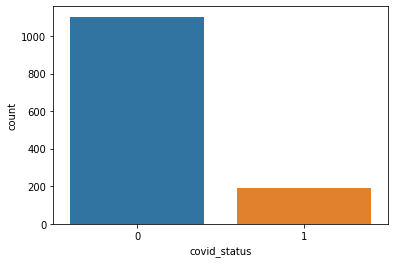

In [225]:
sns.countplot(x=df['covid_status'])

###  We observe that the data is biased and may result in a biased model

In [54]:
feat = features.copy()

In [234]:
features_2=features[features['data']!='failed']

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [236]:
features_2.head()

,data,label
0,"[-310.62064, 99.45015, -7.960432, 8.155906, 8....",healthy
1,"[-454.14752, 58.20006, -36.261097, 14.370856, ...",infected
2,"[-697.53186, 31.209114, -24.06815, 6.829887, -...",healthy
3,"[-567.34454, 39.946983, -26.394186, 13.915938,...",healthy
4,"[-394.94003, 46.37807, -22.14895, 12.818121, -...",healthy


In [237]:
d={'healthy':0,'infected':1}
features_2['label'] = features_2['label'].map(d)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [238]:
features_2['label'].unique()

array([0, 1])

In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [239]:
X=np.array(features_2['data'].tolist())
y=np.array(features_2['label'].tolist())

In [240]:
X.shape

(1223, 40)

In [241]:
y.shape

(1223,)

In [311]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [312]:
X_train.shape

(856, 40)

In [313]:
y_train.shape

(856,)

## Model creation

In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [314]:
# model creation
model = Sequential()

#Dense layer
model.add(Dense(100,input_shape=(40,),activation='relu'))
model.add(Dense(200,activation='relu'))
Dropout(0.5)
model.add(Dense(100,activation='relu'))
Dropout(0.5)
#output layer
model.add(Dense(1,activation='sigmoid'))

#compiling
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [315]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 100)               4100      
_________________________________________________________________
dense_64 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


In [302]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,mode='min')

In [316]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,
         epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 45ms/step - loss: 6.4250 - accuracy: 0.6154 - val_loss: 3.3256 - val_accuracy: 0.8529
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 2.6335 - accuracy: 0.7993 - val_loss: 0.5091 - val_accuracy: 0.8392
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: 0.8946 - accuracy: 0.8475 - val_loss: 0.8598 - val_accuracy: 0.8529
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.8021 - accuracy: 0.7599 - val_loss: 0.7826 - val_accuracy: 0.8529
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.8143 - accuracy: 0.8483 - val_loss: 0.6686 - val_accuracy: 0.6431
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.5603 - accuracy: 0.7751 - val_loss: 0.4548 - val_accuracy: 0.8447
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4355 - accuracy: 0.8460 - val_loss: 0.4732 - val_accuracy: 0.8529
Epoch 8/20
7/7 [===========

In [317]:
mod= pd.DataFrame(model.history.history)
mod

,loss,accuracy,val_loss,val_accuracy
0,4.933333,0.753505,3.325593,0.852861
1,2.085938,0.695093,0.509097,0.839237
2,1.044341,0.853972,0.859803,0.852861
3,0.742943,0.728972,0.782584,0.852861
4,0.737245,0.841121,0.668628,0.643052
5,0.546054,0.821262,0.454848,0.844687
6,0.450063,0.843458,0.473177,0.852861
7,0.425005,0.853972,0.455403,0.850136
8,0.413410,0.856308,0.461272,0.844687
9,0.419249,0.856308,0.460034,0.844687


<AxesSubplot:>

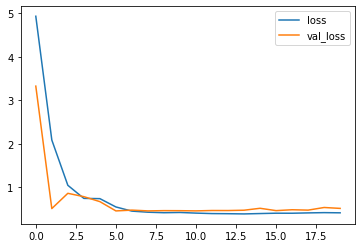

In [318]:
mod[['loss','val_loss']].plot()

<AxesSubplot:>

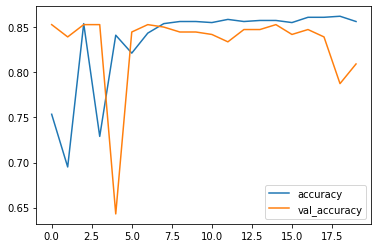

In [319]:
mod[['accuracy','val_accuracy']].plot()

## Predictions

In [320]:
pred = np.argmax(model.predict(X_test),axis=-1)

In [308]:
from sklearn.metrics import classification_report,confusion_matrix

In [321]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       313
           1       0.00      0.00      0.00        54

    accuracy                           0.85       367
   macro avg       0.43      0.50      0.46       367
weighted avg       0.73      0.85      0.79       367



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
confusion_matrix(y_test,pred)

array([[313,   0],
       [ 54,   0]])